## Ajuste de los datos de la carpeta 'pol Vert_Horiz'

In [217]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 6)

import sys
sys.path.insert(0, "/home/oscar/Grive")

from espectroscopia import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [201]:
path='./graficas_polVH/'
name='polVH'

Extraigo los espectros que van del tek0020ALL al tek0031ALL de la carpeta pol_Vert_Horiz.

In [202]:
ini = 20
fin = 31
dat = data_array_tek(ini,fin)
dat0 = dat
dat = data_from_array_to_list(dat)

Me gusta más que los picos apunten hacia arriba asi que los voy a voltear.

In [203]:
for n in range(len(dat)):
    dat[n][1]=-dat[n][1]

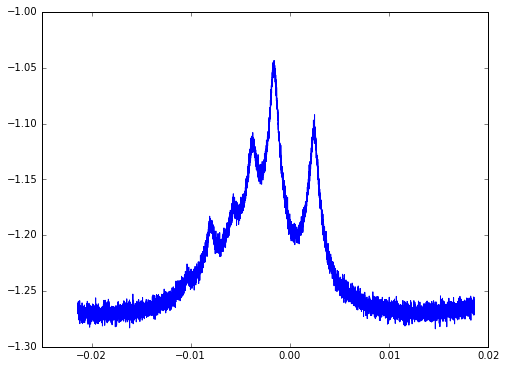

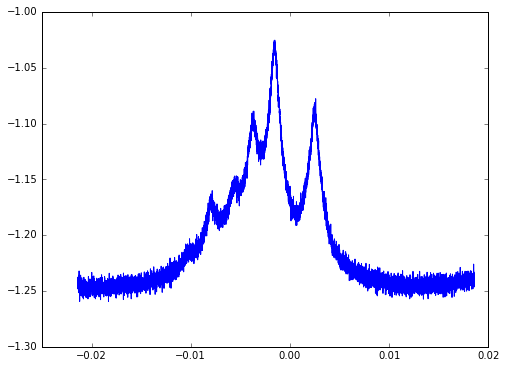

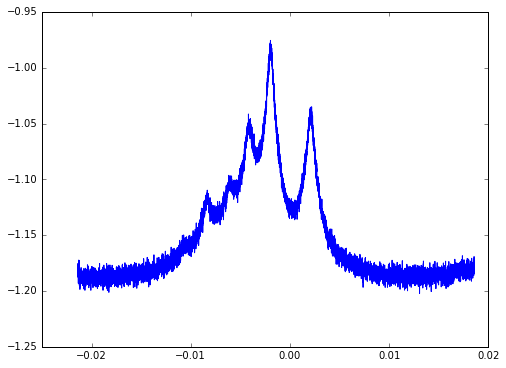

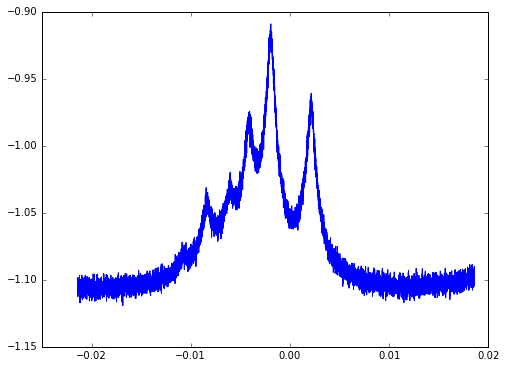

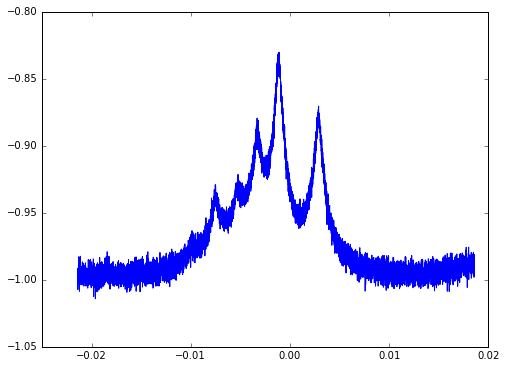

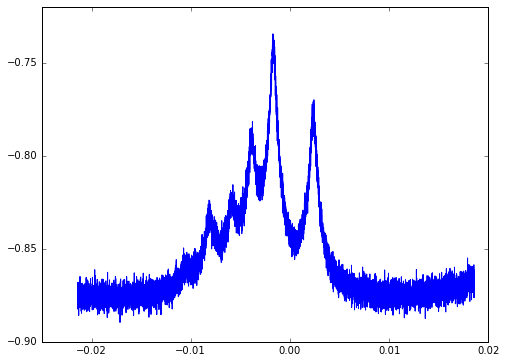

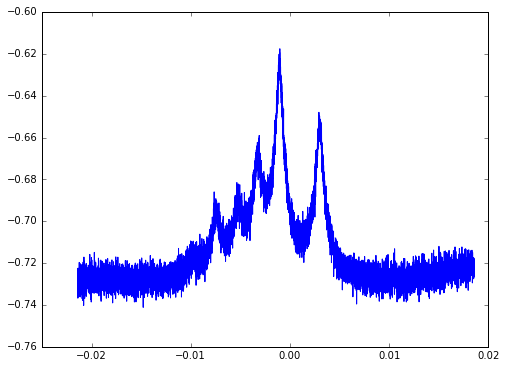

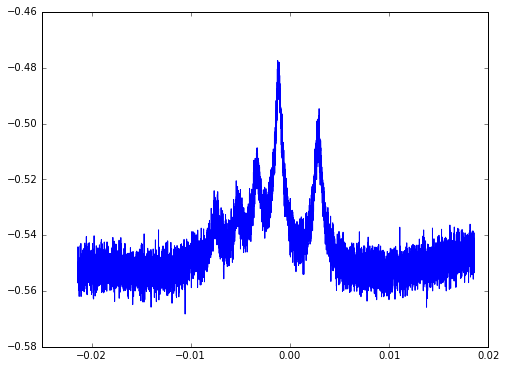

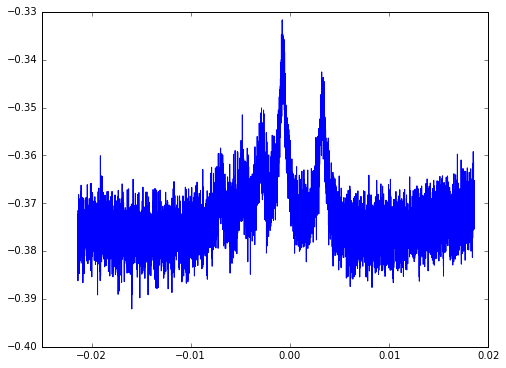

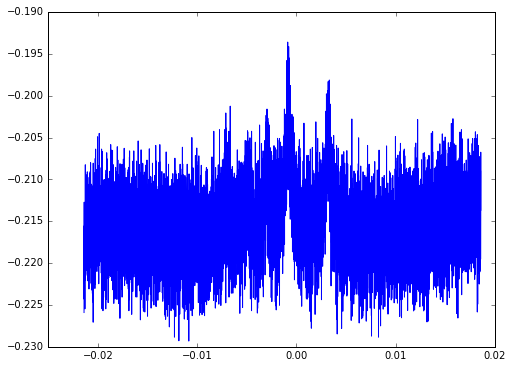

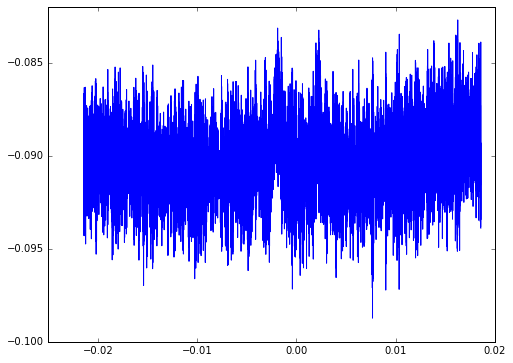

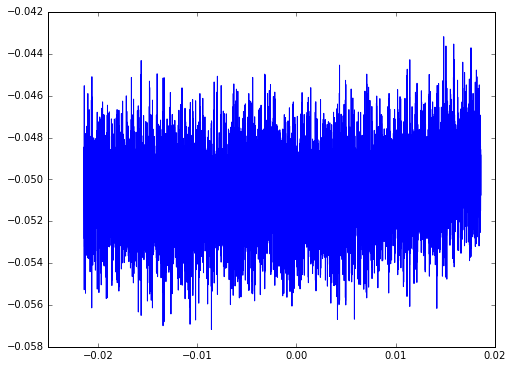

In [204]:
for n in range(len(dat)):
    plot(dat[n][0],dat[n][1])
    show()

Voy a usar como ejemplo el primer espectro. Bien podría correr el mismo algoritmo en los 11 espectros de la carpeta pero para dejar todo el código más simple voy a usar sólo el primero.

In [218]:
t=dat[0][0]
fluo=dat[0][1]
fluoS=volt=savitzky_golay(fluo,31,3)

Grafico el espectro que elegí y la fluorescencia con el filtro Savitzky-Golay

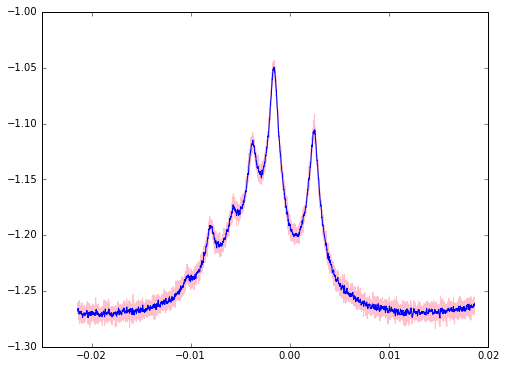

In [219]:
plt.plot(t,fluo, color='pink')
plt.plot(t,fluoS, color= 'blue')

Defino la función de 6 picos lorentzianos que usaré como ajuste.

In [220]:
def fit_lorentz(x,w,xc1,h1,xc2,h2,xc3,h3,xc4,h4,xc5,h5,xc6,h6,fondo):
    return lorentz(x,w,xc1,h1)+lorentz(x,w,xc2,h2)+lorentz(x,w,xc3,h3)+lorentz(x,w,xc4,h4)\
    +lorentz(x,w,xc5,h5)+lorentz(x,w,xc6,h6)+fondo

In [221]:
xdat=linspace(-0.02,0.02,1000)
w=0.001
d=0.0021
xc1=-0.01
xc2=xc1+d
xc3=xc2+d
xc4=xc3+d
xc5=xc4+d
xc6=xc5+1.9*d
h1=0.02
h2=0.04
h3=0.07
h4=0.1
h5=0.18
h6=0.14
fondo=-1.27
ydat=fit_lorentz(xdat,w,xc1,h1,xc2,h2,xc3,h3,xc4,h4,xc5,h5,xc6,h6,fondo)

(-0.02, 0.02)

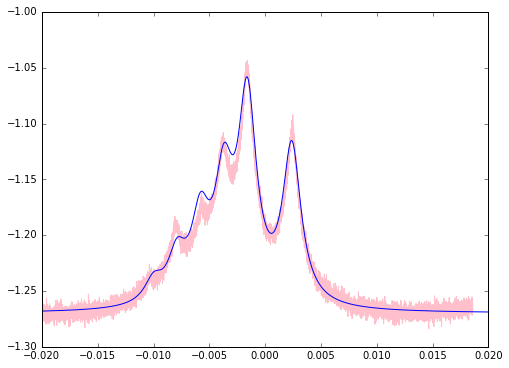

In [222]:
plt.plot(t,fluo,color='pink')
plt.plot(xdat,ydat)
xlim([-0.02,0.02])

## Ajuste lorentziano

Escojo los parámetros iniciales del ajuste así como los límites de estos.

In [223]:
w=0.001
d=0.0021
xc1=-0.01
xc2=xc1+d
xc3=xc2+d
xc4=xc3+d
xc5=xc4+d
xc6=xc5+1.9*d
h1=0.02
h2=0.04
h3=0.07
h4=0.1
h5=0.18
h6=0.14
fondo=-1.27

bound_par = ([0,-inf,0,-inf,0,-inf,0,-inf,0,-inf,0,0,0,-inf],[inf,0,inf,0,inf,0,inf,0,inf,0,inf,inf,inf,0])
pl, covl = curve_fit(fit_lorentz, t, fluo, [w,xc1,h1,xc2,h2,xc3,h3,xc4,h4,xc5,h5,xc6,h6,fondo],\
                       bounds=bound_par)

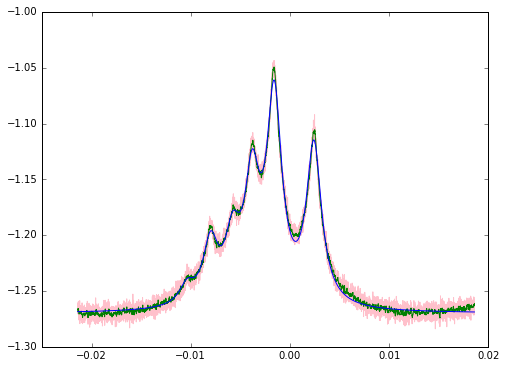

In [224]:
plt.plot(t,fluo,color='pink')
plt.plot(t,fluoS,color='green')
plt.plot(t,fit_lorentz(t, *pl),label='fit',color='b')

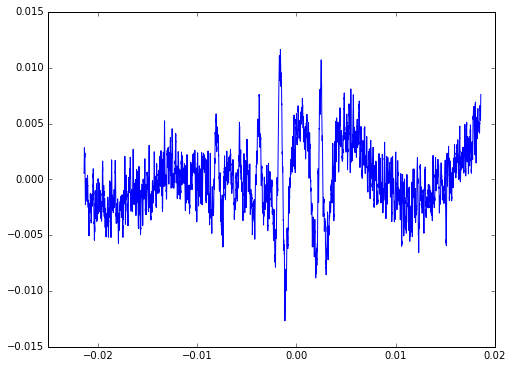

In [225]:
plt.plot(t,fluoS-fit_lorentz(t, *pl),label='fit',color='b')

### Ajuste Voigt

In [213]:
def fit_voigt(x,sig,w,xc1,h1,xc2,h2,xc3,h3,xc4,h4,xc5,h5,xc6,h6,fondo):
    return voigt(x,sig,w,xc1,h1)+voigt(x,sig,w,xc2,h2)+voigt(x,sig,w,xc3,h3)+voigt(x,sig,w,xc4,h4)\
    +voigt(x,sig,w,xc5,h5)+voigt(x,sig,w,xc6,h6)+fondo

Para el ajuste de Voigt voy a usar como condiciones iniciales los parametros del ajuste lorentziano anterior. `sig` es la componente de ancho gaussiano y `w` la de ancho lorentziano.

In [214]:
sig=pl[0]/4
w=pl[0]/4
xc1=pl[1]
xc2=pl[3]
xc3=pl[5]
xc4=pl[7]
xc5=pl[9]
xc6=pl[11]
h1=pl[2]
h2=pl[4]
h3=pl[6]
h4=pl[8]
h5=pl[10]
h6=pl[12]
fondo=pl[13]

#bound_par = ([-inf,-inf,-inf,0,-inf,0,-inf,0,-inf,0,-inf,0,0,0,-inf],[inf,inf,0,inf,0,inf,0,inf,0,inf,0,inf,inf,inf,0])
pv, covv = curve_fit(fit_voigt, t, fluo, [sig,w,xc1,h1,xc2,h2,xc3,h3,xc4,h4,xc5,h5,xc6,h6,fondo])#,bounds=bound_par)

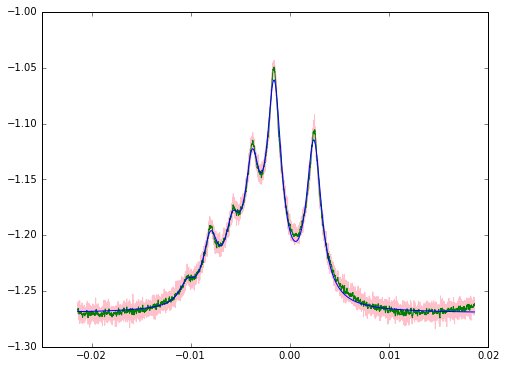

In [215]:
plt.plot(t,fluo,color='pink')
plt.plot(t,fluoS,color='green')
plt.plot(t,fit_voigt(t, *pv),label='fit',color='b')

Me queda la componente de ancho gaussiana es:

In [216]:
pv[0]

1.8388258060361383e-08

Y la componente de ancho lorentziano es:

In [199]:
pv[1]

0.00093609997633842506

De modo que el perfil es prácticamente lorentziano!